# Import Libraries and Data

In [1]:
from google.colab import files
upload=files.upload()

Saving Dataset 2.csv to Dataset 2 (2).csv


In [2]:
pip install jupyter-summarytools

In [3]:
import pandas as pd
from summarytools import dfSummary

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [4]:
df=pd.read_csv("Dataset 2.csv")
df.head()

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,...,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,bad
1,2,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,...,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,good
2,3,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,...,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,bad
3,4,<0,NaN,existing paid,business,605.0,<100,4<=X<7,2,male div/sep,...,30,none,for free,320,skilled,1.0,none,yes,1296,bad
4,5,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,...,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,bad


In [5]:
print("Shape of Data:",df.shape)
print("Info:",df.info())

Shape of Data: (5050, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_id             5050 non-null   int64  
 1   checking_status         5050 non-null   object 
 2   duration                5048 non-null   float64
 3   credit_history          5050 non-null   object 
 4   purpose                 5050 non-null   object 
 5   credit_amount           5048 non-null   float64
 6   savings_status          5045 non-null   object 
 7   employment              5049 non-null   object 
 8   installment_commitment  5050 non-null   int64  
 9   personal_status         5050 non-null   object 
 10  other_parties           5050 non-null   object 
 11  residence_since         5050 non-null   int64  
 12  property_magnitude      5049 non-null   object 
 13  age                     5050 non-null   int64  
 14  other_payment_

In [6]:
print("Description:")
df.describe().T

Description:


,count,mean,std,min,25%,50%,75%,max
Customer_id,5050.0,2525.500000,1.457954e+03,1.0,1263.25,2525.5,3787.75,5050.0
duration,5048.0,35.365095,3.075480e+01,4.0,18.00,33.0,51.00,999.0
credit_amount,5048.0,72945.602021,3.943092e+06,250.0,958.00,4297.0,10875.25,272803999.0
installment_commitment,5050.0,3.026139,1.802462e+01,1.0,2.00,3.0,4.00,772.0
residence_since,5050.0,2.549505,1.119351e+00,1.0,2.00,3.0,4.00,4.0
age,5050.0,44.893267,1.672590e+01,19.0,30.00,43.0,59.00,200.0
bureau_score,5050.0,200.471287,1.553308e+02,10.0,40.00,190.0,340.00,480.0
num_dependents,5043.0,6.244101,4.427129e+00,1.0,2.00,6.0,10.00,14.0
Spend_debit_card,5050.0,2507.577624,1.462481e+03,-50.0,1225.00,2532.5,3762.75,5000.0


In [7]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Customer_id[int64],Mean (sd) : 2525.5 (1458.0)min < med < max:1.0 < 2525.5 < 5050.0IQR (CV) : 2524.5 (1.7),"5,050 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,checking_status[object],1. >=2002. no checking3. 0<=X<2004. <0,"1,621 (32.1%)1,548 (30.7%)1,301 (25.8%)580 (11.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB9ElEQVR4nO3bTWrbUBiF4asiQjORMAYvxovoYrsI7cYY30ETMlEHHZb8EIsjXfl5VvANXmRkdLp5ngsk/Fj7AB6H2IjpSinPpZSntQ9ZwNs8zy9rH8H7+uPx+GsYhsPah9yr1nrtuu634LarH4bhcD6fX8ZxfF37mO+63W4/p2k6XC6Xp1KK2DaqL6WUcRxfT6fTn7WPudPz2gfwMS8IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEZMX8q/T3TWPuQerd//KPpa63WapkNp/BOdWuu1lPK29h28z2fhxHSmfKR4QSBmDz+jfj4b0fy6yqqqHU2vq6yq2rKHdVXTf9k8Ei8IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IhpesrX6t2PqvkpnwlfO2wQiDHlI6aFJ5sn105sfl1lPbUfm15XWU/tSwvrqibfkvmfP3WJERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEbPpddVW7+J7Nr+usp7aDxsEYqyriFnyyeYJxIcWW1dZQfGZRdZVVlB8xZLrqk2+zbId/tQlRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERswi6yorKL5isXWVFRSfsUEgxrqKGC8IxPwFJ5zYuYc0qaoAAAAASUVORK5CYII="">",0(0.0%)
3,duration[float64],Mean (sd) : 35.4 (30.8)min < med < max:4.0 < 33.0 < 999.0IQR (CV) : 33.0 (1.1),70 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/TejxPPwpeLodZal+v1+nkYhtWU4YfD4bXW+iJWHnXtizofhmG13W6P4zie7hncWlvsdrvVfr+fl1KEykOu/vpLKWUcx9Nms3mbMH854Qx84zFFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEmN2yqbW2uHdwa21xPp9npZSh1nr3xfh33nvvp58WPwF79y3yrjldnwAAAABJRU5ErkJggg=="">",2(0.0%)
4,credit_history[object],1. no credits/all paid2. critical/other existing credit3. existing paid4. delayed previously5. all paid,"1,209 (23.9%)1,206 (23.9%)1,155 (22.9%)784 (15.5%)696 (13.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACMklEQVR4nO3bQWrbUBiF0V/FhGYiYQxejBfRxXYR2o0x1qAJmaiDEjBNMpOuHso5K3iDD4kndLt5ngsSfmx9AL4PsREjNmK6qnquqqetD/Kft3meX7Y+BMs6nE6nX33fH7c+yKNpmm5d1/0W3L4c+r4/Xi6Xl2EYXrc+TFXV/X7/OY7j8Xq9PlWV2HbkUFU1DMPr+Xz+s/VhHjxvfQCW54JAjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMQcqv791rP1Qd61dBaWdZim6TaO47Ea+q1nmqZbVb1tfQ6W5bdwYjq7UVJcEIjxGiXGuooY6ypirKuIcUEgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmKsq4ixriLGb+HEWFcR44JATGuvUa/PHWtqXWVVtW/NrKusqvavtXVVM59fWJ4LAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLER08y6qoUzsK6m1lVWVfvmt3BirKuISTzZPK2oqsDgxYiFd6sOXoxYeJQYvGx+y6UNPuoSIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI2bVdZXFFI9WX1dZTPHOBoEY6ypi1nqyeZrxwSrrKosqPrP4usqiiq+sta6yqOIDH3WJERsxY

### Check Class Imbalance

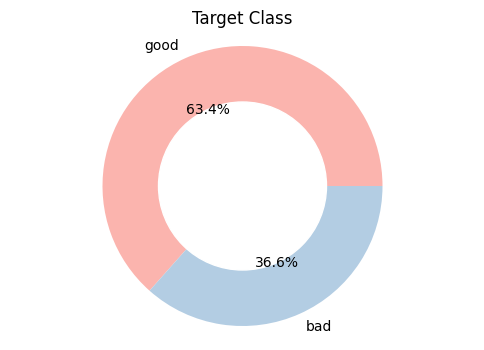

In [8]:
plt.figure(figsize=(6,4))
Pastel1_7 = plt.cm.Pastel1

circle=plt.Circle((0,0),0.6,color="white")
values = df["class"].value_counts()
plt.pie(values, labels=values.index, colors=Pastel1_7.colors, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Target Class")
plt.axis('equal')
plt.show()

The class distribution in the target variable is ~64:36 indicating an imbalance dataset.

### Univariate Analysis of Categorical Variables

In [9]:
categorical_variable=df.select_dtypes(include=["object"]).columns

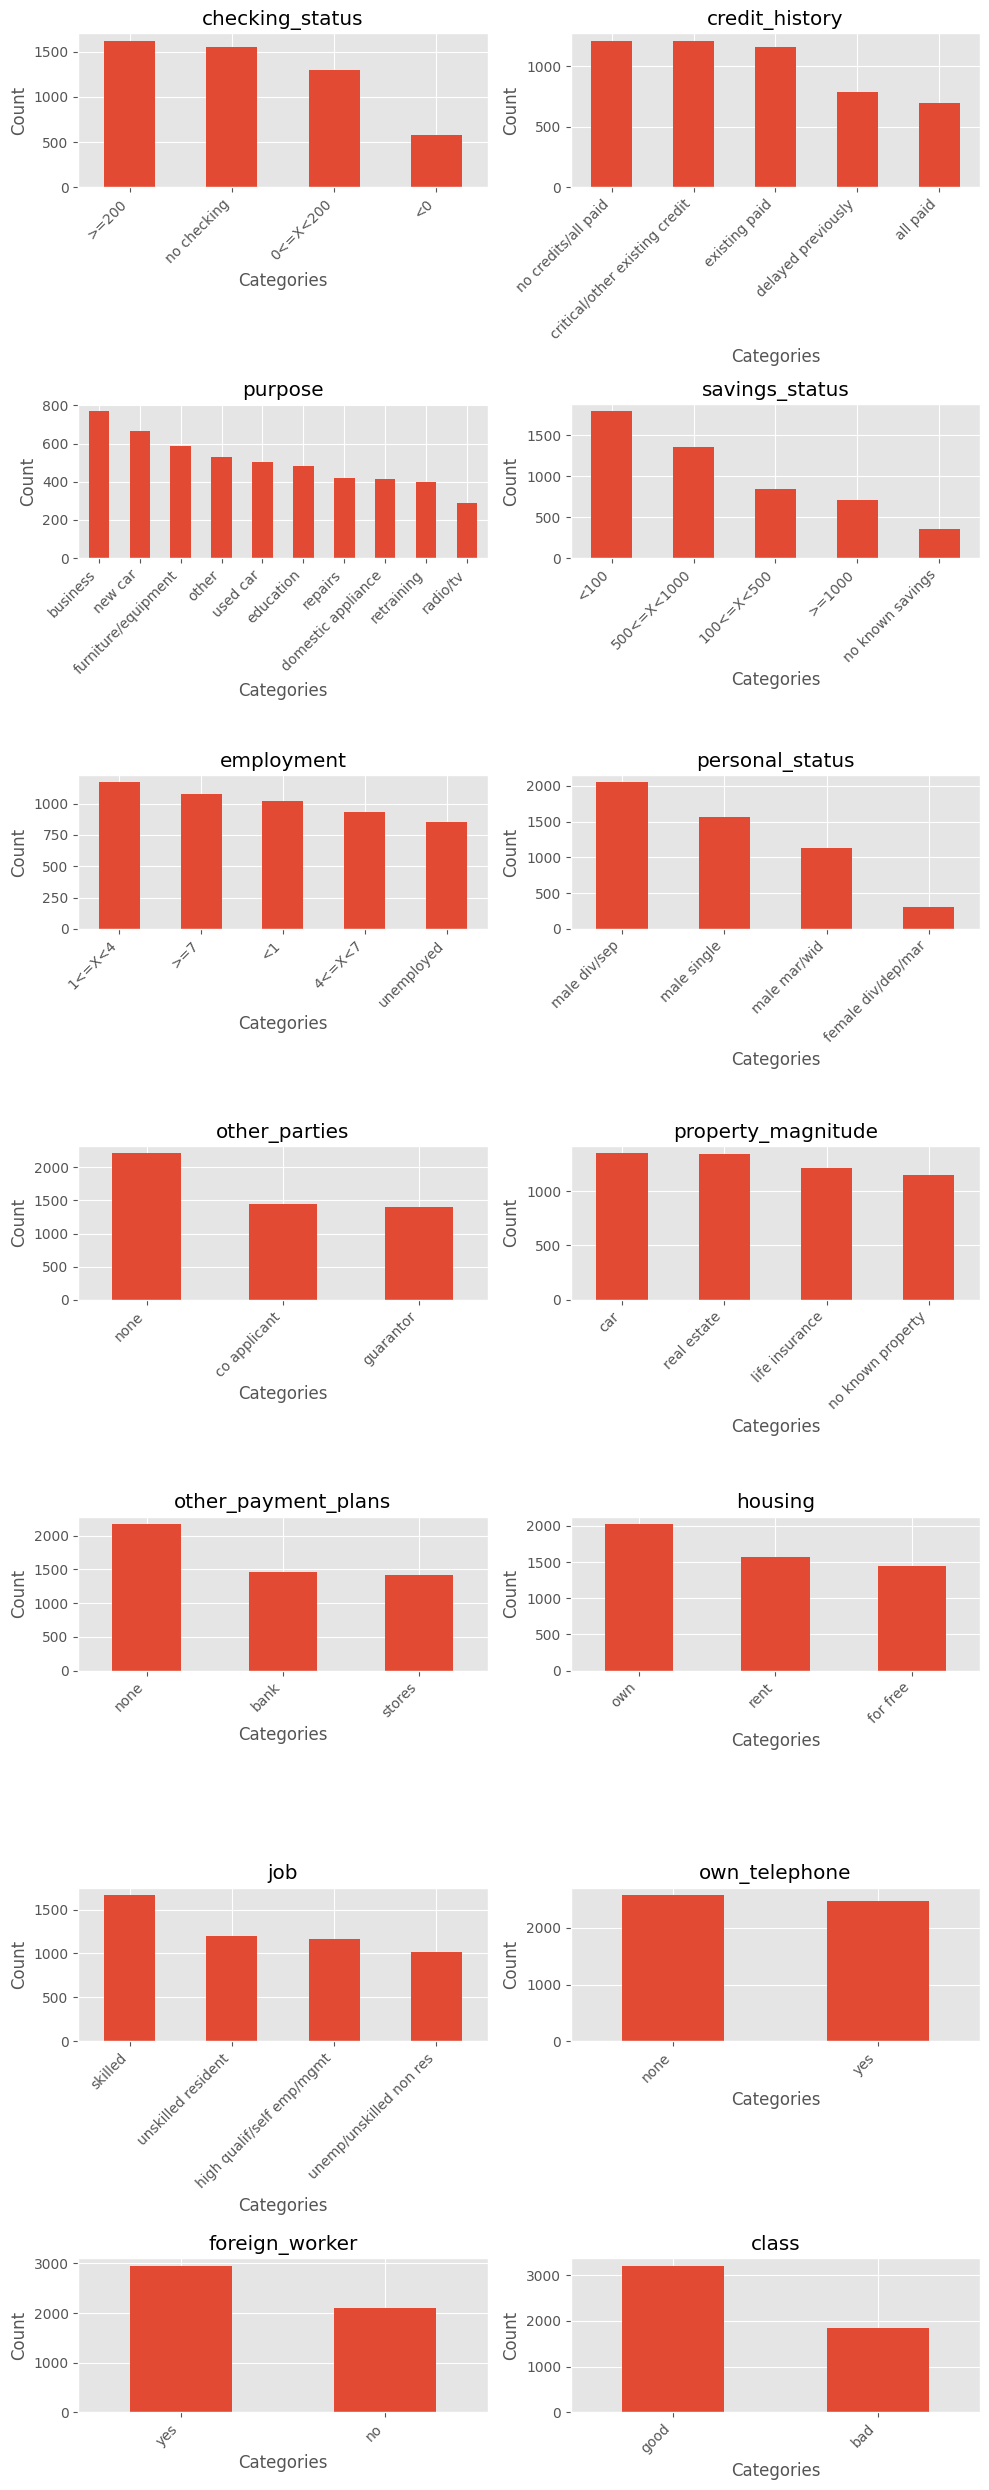

In [10]:
plt.style.use("ggplot")
Pastel1_7 = plt.cm.Pastel1

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 25))

axes = axes.flatten()

for i, col in enumerate(categorical_variable):
    values = df[col].value_counts()
    ax = values.plot(kind='bar', ax=axes[i])
    ax.set_title(col)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')
    ax.set_xticklabels(values.index, rotation=45, ha='right')

for i in range(len(categorical_variable), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Observations :
*   The majority of client status checks are greater than 200, followed by no checks.
*   The majority of the client credit history has no or completely paid credits, but is followed by critical/other existing credits.
*   The top three reasons for which customers obtain loan credits are for business, a new car, and furniture/equipment.
*   The bulk of customers have a saving status of less than 100, followed by 500 to 1000.
*   The majority of customers have been employed for one to four years, with the remainder having been employed for more than seven years.  The majority of our clients have been experienced workers.
*   The vast majority of our clients are men.
*   The majority of customers have no coapplicant or guarantor.
*   The majority of customers have property magnitudes like as vehicle, real estate, and life insurance.
*   The majority of customers are skilled international workers.








## Univariate analysis for Numerical Variable

In [11]:
numerical_variable= df.select_dtypes(include=np.number).columns
numerical_variable=numerical_variable.drop(["Customer_id","residence_since","installment_commitment"])
numerical_variable

Index(['duration', 'credit_amount', 'age', 'bureau_score', 'num_dependents',
       'Spend_debit_card'],
      dtype='object')

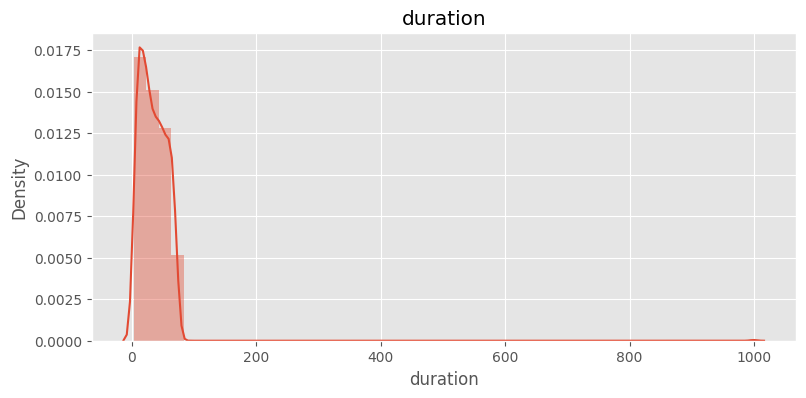

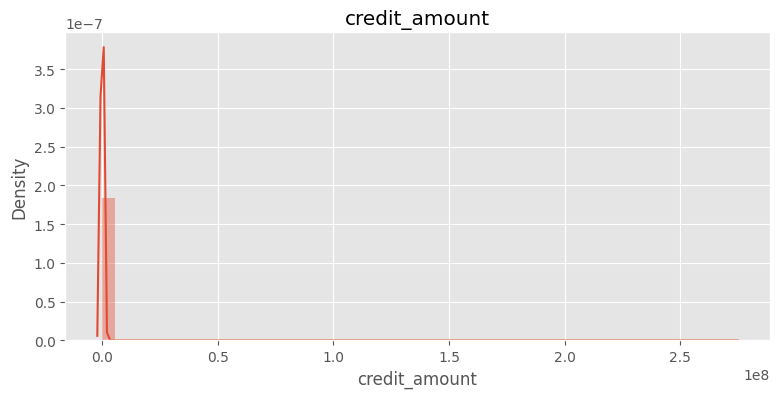

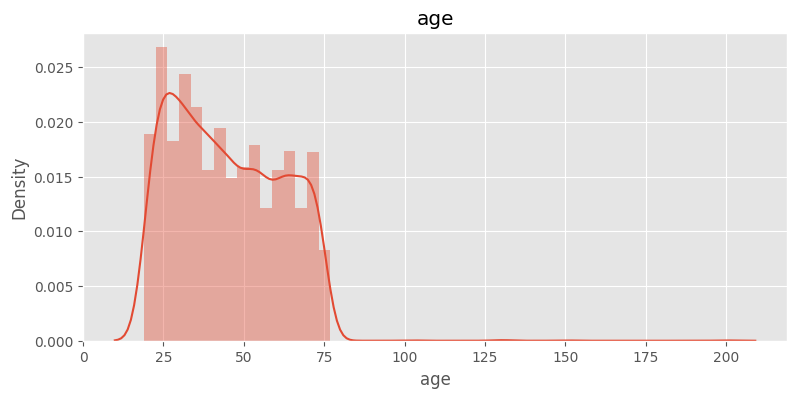

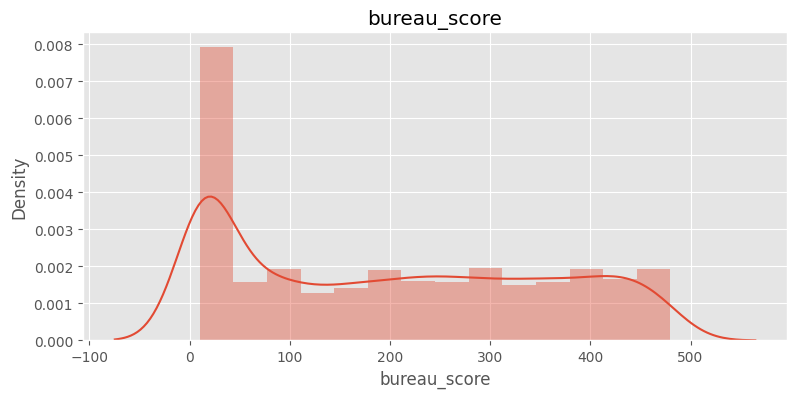

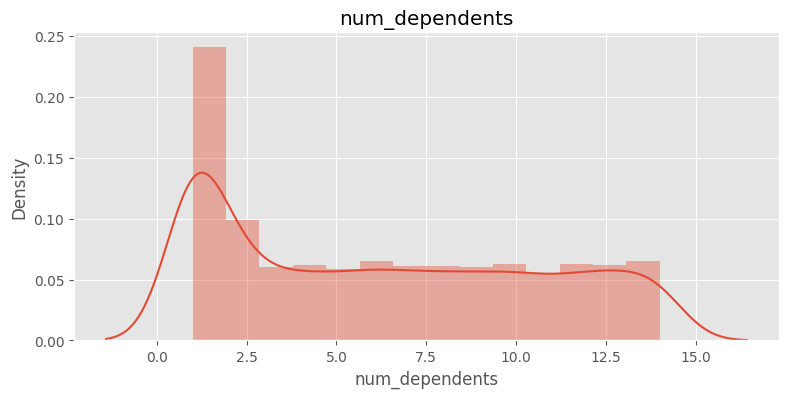

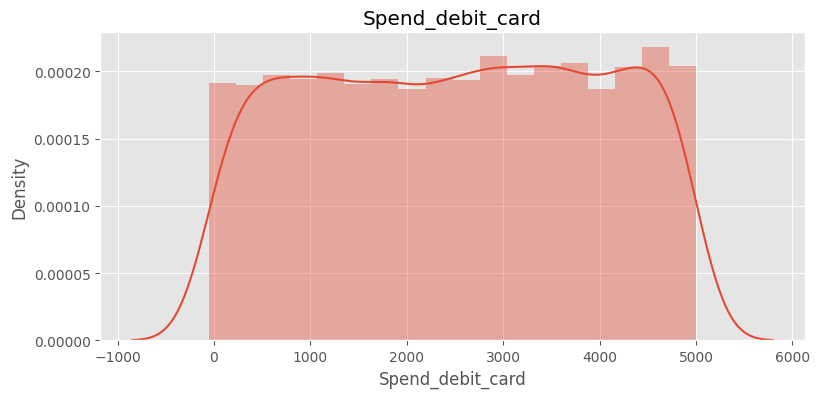

In [12]:
for i in numerical_variable:
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  sns.distplot(df[i],kde=True)
  plt.title(i)
plt.show()

The histogram shows that the features 'duration,' 'credit_amount,' and 'age' are severely skewed.


## Bivariate Analysis

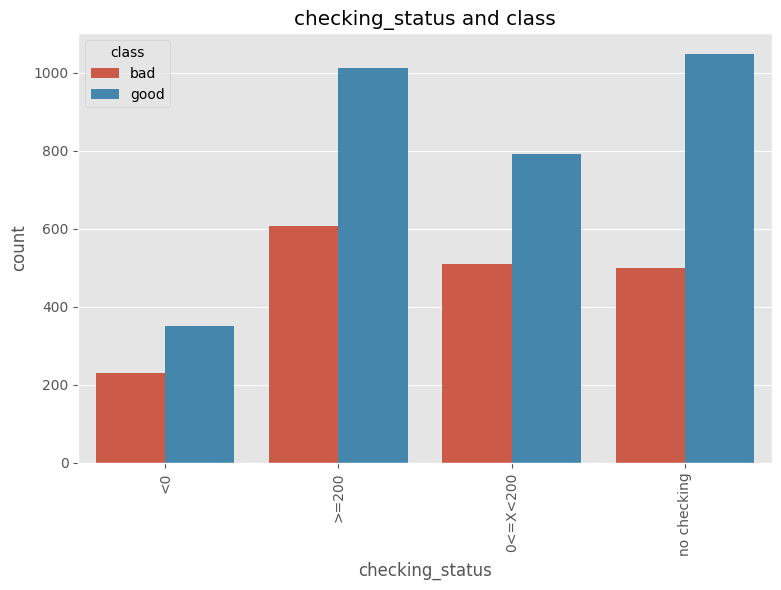

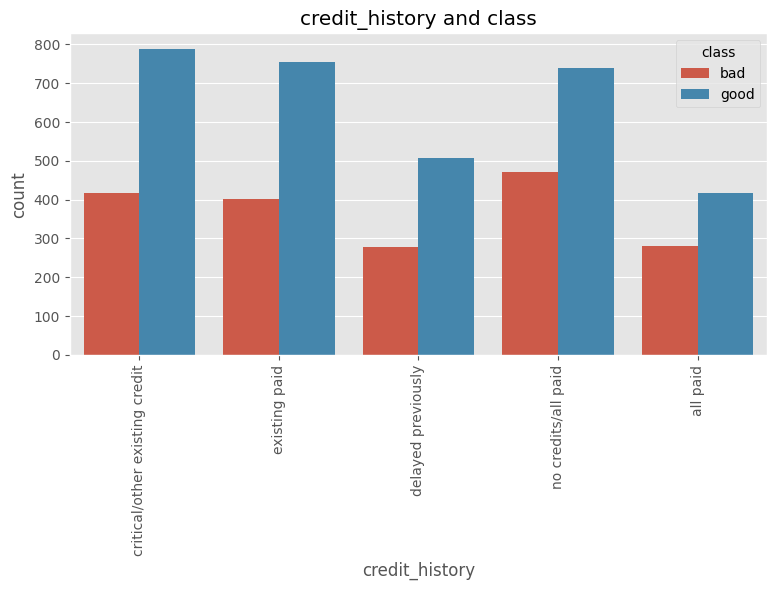

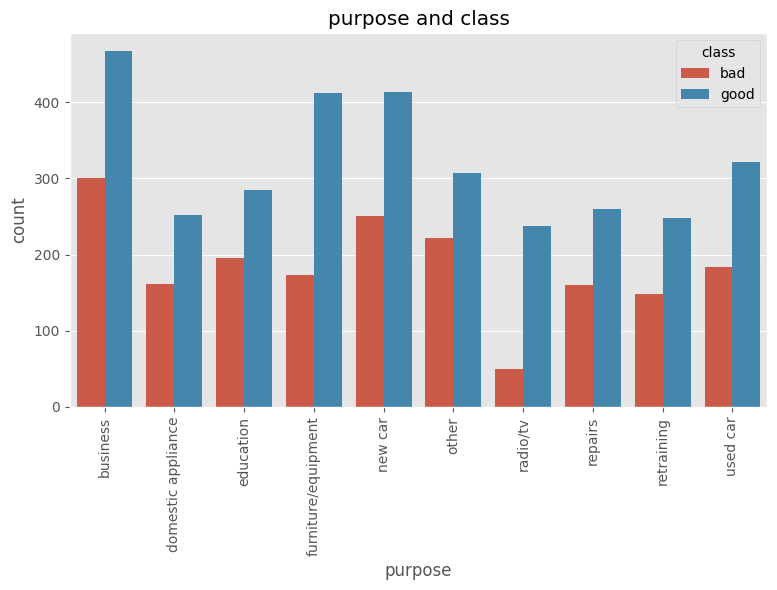

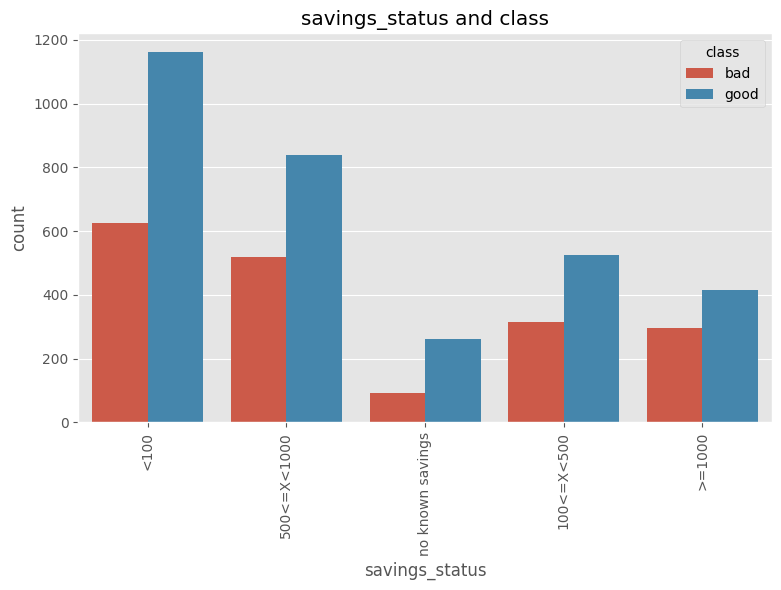

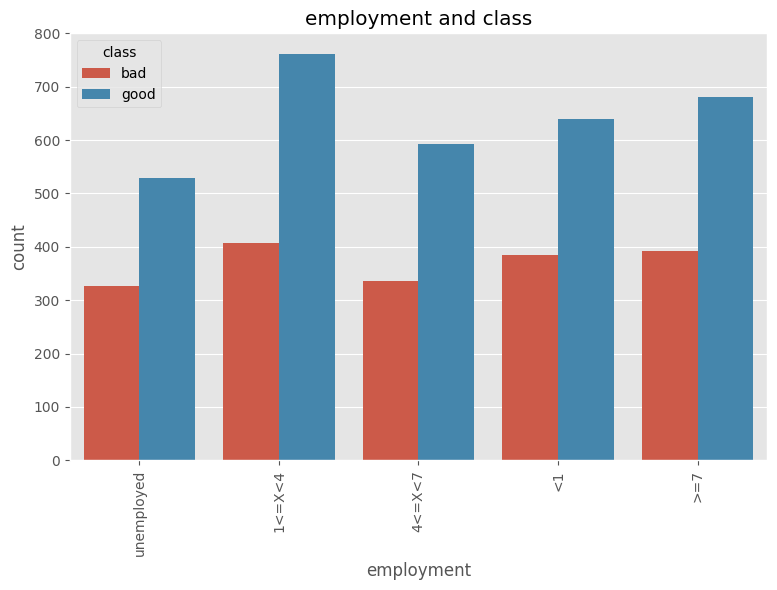

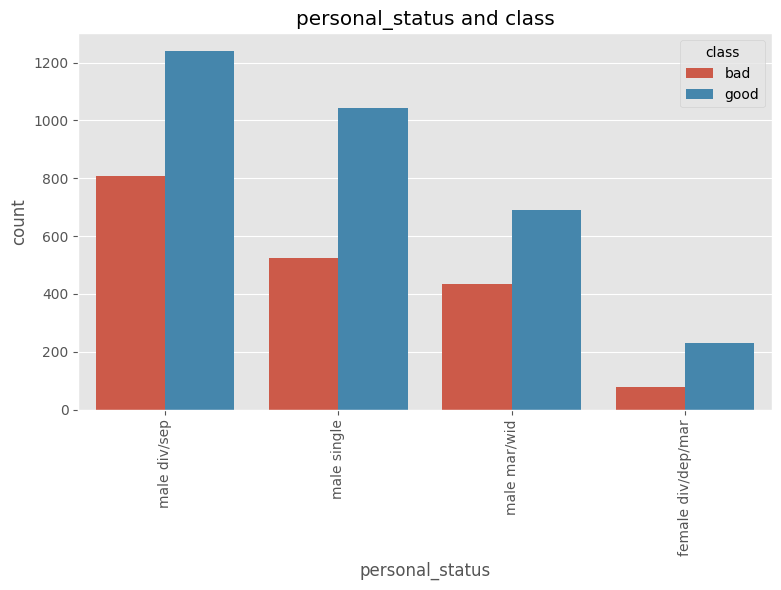

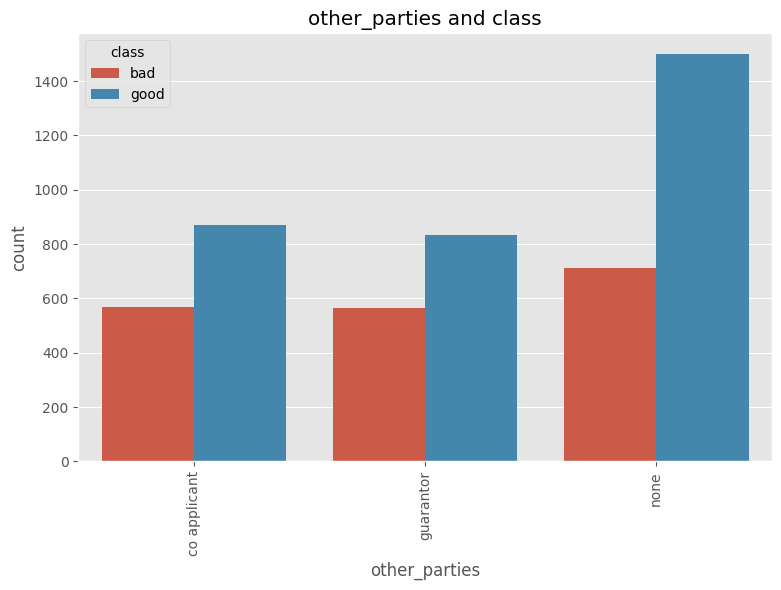

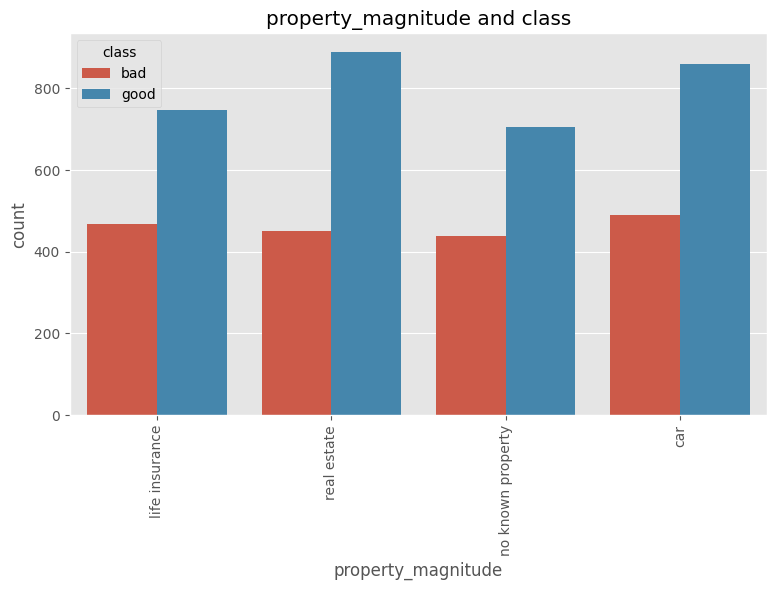

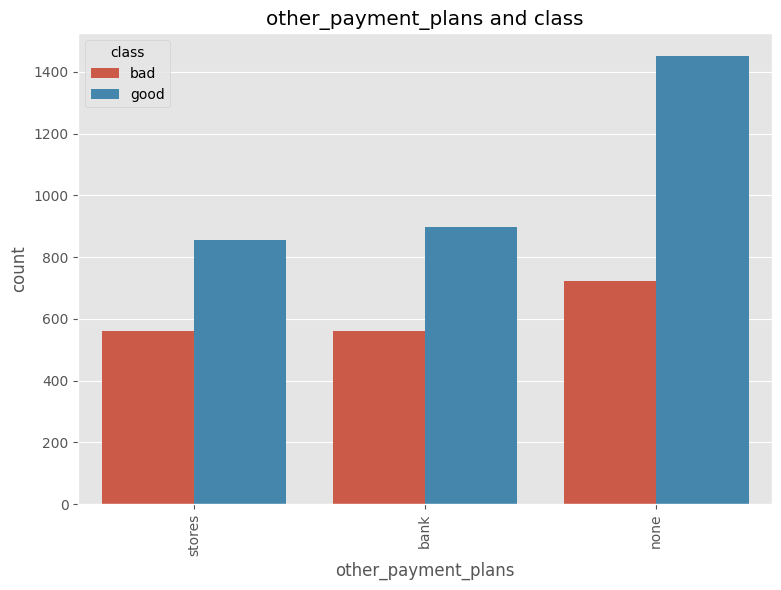

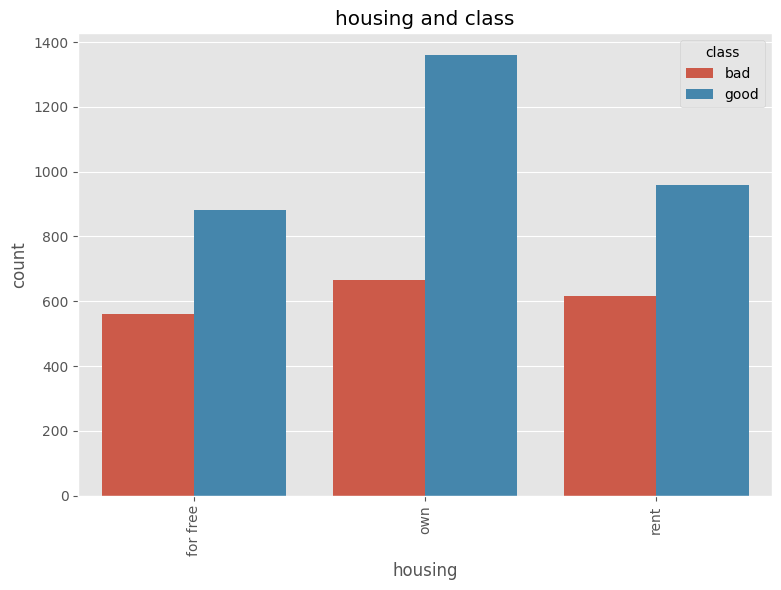

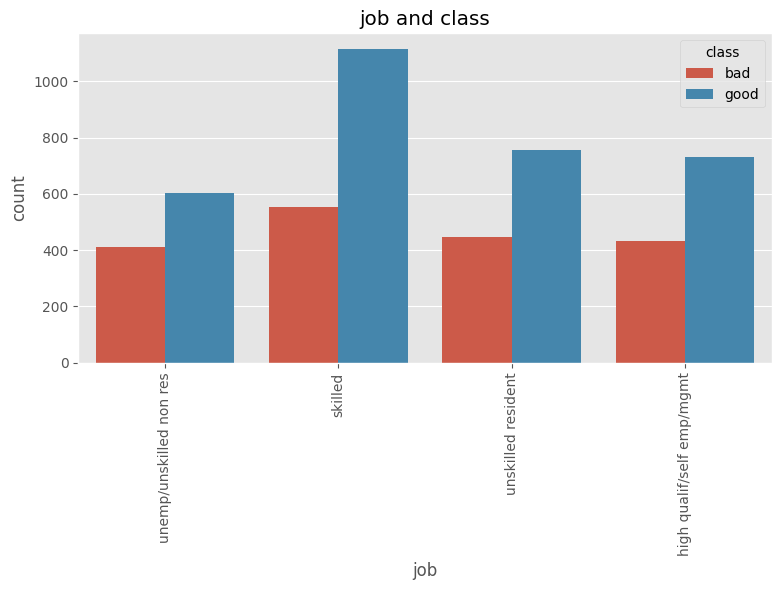

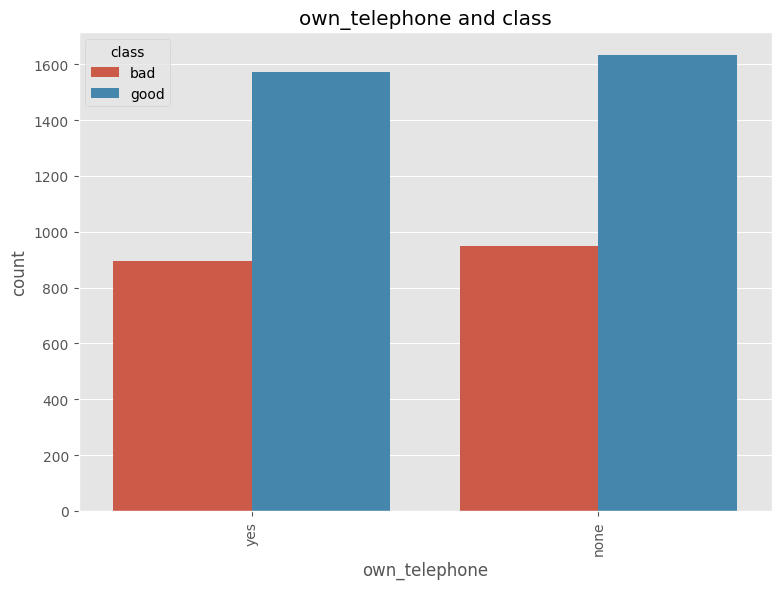

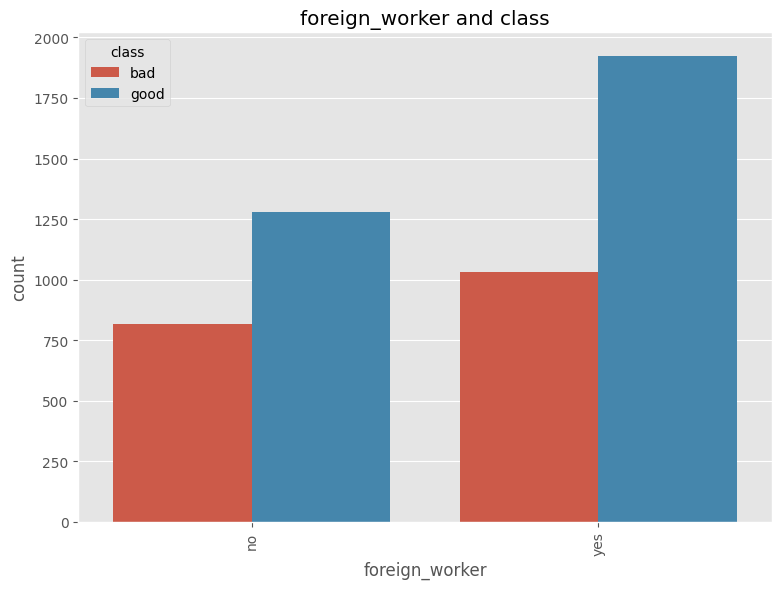

In [13]:
categorical_variable=categorical_variable.drop(["class"])

for i in categorical_variable:
  plt.figure(figsize=(15,6))
  plt.subplot(121)
  sns.countplot(data=df,x=i,hue="class")
  plt.title(f"{i} and class")
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

# Outlier Detection

Outliers have a large impact on the Mean and Variance.The treatment of outliers becomes necessary.


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_id,5050.0,2525.500000,1.457954e+03,1.0,1263.25,2525.5,3787.75,5050.0
duration,5048.0,35.365095,3.075480e+01,4.0,18.00,33.0,51.00,999.0
credit_amount,5048.0,72945.602021,3.943092e+06,250.0,958.00,4297.0,10875.25,272803999.0
installment_commitment,5050.0,3.026139,1.802462e+01,1.0,2.00,3.0,4.00,772.0
residence_since,5050.0,2.549505,1.119351e+00,1.0,2.00,3.0,4.00,4.0
age,5050.0,44.893267,1.672590e+01,19.0,30.00,43.0,59.00,200.0
bureau_score,5050.0,200.471287,1.553308e+02,10.0,40.00,190.0,340.00,480.0
num_dependents,5043.0,6.244101,4.427129e+00,1.0,2.00,6.0,10.00,14.0
Spend_debit_card,5050.0,2507.577624,1.462481e+03,-50.0,1225.00,2532.5,3762.75,5000.0


1. Values considerably above the 75th percentile and maximum values for duration, credit_amount, age, bureau_score, and spend_debit_card could be considered outliers.

2. Outliers for the variables "installment_commitment" and "num_dependents" could be values beyond the quartile range.

3. 'residence_since' could contain outliers that are higher than the maximum value of 4.0.


The IQR is a statistical dispersion metric that represents the range of data between the first (Q1) and third (Q3) quartiles. The code uses the IQR to identify probable outliers by finding the lower and upper bounds of the data distribution. Outliers are data points that fall below the lower boundary or over the upper boundary.


In [15]:
lower_boundary=[]
upper_boundary=[]
col=[]
IQR=[]
for i in df.select_dtypes(include=np.number).columns:
  q3=df[i].quantile(0.75)
  q1=df[i].quantile(0.25)
  IQR_value=q3-q1
  lower_bound=q1-(1.5*IQR_value)
  upper_bound=q3+(1.5*IQR_value)
  lower_boundary.append(lower_bound)
  upper_boundary.append(upper_bound)
  IQR.append(IQR_value)
  col.append(i)

d1 = pd.DataFrame({"Variable": col,"Lower_boundary": lower_boundary, "IQR":IQR,"Upper_boundary": upper_boundary})

d1=d1.set_index("Variable")
d1

,Lower_boundary,IQR,Upper_boundary
Variable,,,
Customer_id,-2523.500,2524.50,7574.500
duration,-31.500,33.00,100.500
credit_amount,-13917.875,9917.25,25751.125
installment_commitment,-1.000,2.00,7.000
residence_since,-1.000,2.00,7.000
age,-13.500,29.00,102.500
bureau_score,-410.000,300.00,790.000
num_dependents,-10.000,8.00,22.000
Spend_debit_card,-2581.625,2537.75,7569.375


In [16]:
variable=[]
outlier_count=[]
for i in df.select_dtypes(include=np.number).columns:
    outlier=(df[i]>d1.loc[i][2]).sum()
    outlier_count.append(outlier)
    variable.append(i)

for var, count in zip(variable, outlier_count):
    print(f"{var} had {count} outliers.")

Customer_id had 0 outliers.
duration had 3 outliers.
credit_amount had 4 outliers.
installment_commitment had 3 outliers.
residence_since had 0 outliers.
age had 4 outliers.
bureau_score had 0 outliers.
num_dependents had 0 outliers.
Spend_debit_card had 0 outliers.


In [17]:
fig = px.box(df.select_dtypes(include=np.number),orientation="h")

fig.update_layout(title_text='Boxplot of Numerical Variables')
fig.show()

Replace all outliers that are greater than the upper boundary with the upper boundary.


In [18]:
for i in df.select_dtypes(include=np.number).columns:
    upper_bound = d1.loc[i, "Upper_boundary"]
    df.loc[df[i] > upper_bound, i] = upper_bound

In [19]:
# Check For Outliers
variable=[]
outlier_count=[]
for i in df.select_dtypes(include=np.number).columns:
    outlier=(df[i]>d1.loc[i][2]).sum()
    outlier_count.append(outlier)
    variable.append(i)

for var, count in zip(variable, outlier_count):
    print(f"{var} had {count} outliers.")

Customer_id had 0 outliers.
duration had 0 outliers.
credit_amount had 0 outliers.
installment_commitment had 0 outliers.
residence_since had 0 outliers.
age had 0 outliers.
bureau_score had 0 outliers.
num_dependents had 0 outliers.
Spend_debit_card had 0 outliers.


# Missing Value

The goal is to use appropriate approaches to handle missing values in the dataset to ensure data completeness and dependability.

The method makes use of methods to fill in missing values in the dataset, improving data quality for subsequent analysis and modelling.


In [20]:
df.isnull().sum()

Customer_id               0
checking_status           0
duration                  2
credit_history            0
purpose                   0
credit_amount             2
savings_status            5
employment                1
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        1
age                       0
other_payment_plans       0
housing                   8
bureau_score              0
job                       0
num_dependents            7
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

As we can see, certain missing values are there in the data.


In [21]:
numerical_variable = df.select_dtypes(include=np.number).columns
categorical_variable = df.select_dtypes(include=np.object).columns

In [22]:
# Fill missing values with median
for i in numerical_variable:
    median_value = df[i].median()
    df[i].fillna(median_value, inplace=True)

In [23]:
# Fill missing values with Mode
for i in categorical_variable:
    mode_value = df[i].mode().iloc[0]
    df[i].fillna(mode_value, inplace=True)

In [24]:
print(df.isnull().sum())

Customer_id               0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
bureau_score              0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64


# Feature Engineering

To improve the predictive power and performance of machine learning models on the dataset, create new informative features or change existing ones.


In [26]:
data=df.copy()

In [27]:
# Creating feature for total monthaly installments
data['total_monthly_installments'] = data['credit_amount'] / data['installment_commitment']

# Creating features for customer has co_applicant or guarantor or not
data['has_co_applicant_or_guarantor'] = df['other_parties'].apply(lambda x: 0 if x == 'none' else 1)

# Creating feature for customer's own property
data['has_own_property'] = df['property_magnitude'].apply(lambda x: 1 if x == 'car' or x == 'real estate' or x=="life insurance" else 0)

# Creating feature for customer's other payment plan
data['has_other_payment_plan'] = df['other_payment_plans'].apply(lambda x: 1 if x != 'none' else 0)


In [28]:
# Created creadit score using bureau score bin
data["credit_score_category"] = 0
for index, row in data.iterrows():
    bureau_score = row["bureau_score"]
    if bureau_score <= 200:
        data.at[index, "credit_score_category"] = 0
    elif bureau_score <= 300:
        data.at[index, "credit_score_category"] = 1
    elif bureau_score <= 400:
        data.at[index, "credit_score_category"] = 2
    else:
        data.at[index, "credit_score_category"] = 3

data["credit_score_category"].value_counts()

0    2643
1     871
2     832
3     704
Name: credit_score_category, dtype: int64

In [29]:
# created Monthaly savings
savings_map = {'<100': 50, '100<=X<500': 300, '500<=X<1000': 750, '>=1000': 1500,"no known savings":0}
data['monthly_savings'] = df['savings_status'].map(savings_map)

In [30]:
# Created cutomer's Year of employment and employment stability
years_of_employment = {'<1': 1, '1<=X<4': 2, '4<=X<7': 3, '>=7': 4,"unemployed":0}
data['years_of_employment'] = df['employment'].map(years_of_employment)
data['employment_stability'] = data['years_of_employment'].apply(lambda x: 1 if x > 2 else 0)

Let's look at age of customer

In [31]:
data["age"].max()

102.5

As we can that the oldest customer is of 102 year old. Which indicate this abnormal.

In [32]:
data[data["age"]>90]

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,Spend_debit_card,class,total_monthly_installments,has_co_applicant_or_guarantor,has_own_property,has_other_payment_plan,credit_score_category,monthly_savings,years_of_employment,employment_stability
4936,4937.0,no checking,64.0,critical/other existing credit,used car,609.0,>=1000,<1,4,male mar/wid,...,3604.0,bad,152.250000,1,1,1,0,1500,1,0
4999,5000.0,no checking,18.0,critical/other existing credit,used car,3229.0,no known savings,unemployed,2,male single,...,4316.0,good,1614.500000,0,0,0,0,0,0,0
5008,5009.0,no checking,39.0,existing paid,used car,2569.0,500<=X<1000,1<=X<4,4,male single,...,151.0,good,642.250000,0,1,0,0,750,2,0
5021,5022.0,no checking,24.0,critical/other existing credit,used car,4042.0,no known savings,4<=X<7,3,male single,...,3876.0,good,1347.333333,0,1,0,0,0,3,1
5032,5033.0,no checking,39.0,all paid,used car,10949.0,<100,4<=X<7,2,male single,...,3202.0,good,5474.500000,0,1,1,1,50,3,1


In [33]:
# Created Categorical age for customer's age.
data["categorized_age"] = 0
for index, row in data.iterrows():
    age = row["age"]
    if age <= 30:
        data.at[index, "categorized_age"] = 0
    elif age <= 60:
        data.at[index, "categorized_age"] = 1
    else:
        data.at[index, "categorized_age"] = 2

data["categorized_age"].value_counts()

1    2615
0    1279
2    1156
Name: categorized_age, dtype: int64

Unneeded columns should be removed.


In [34]:
data=data.drop(["other_parties","property_magnitude","other_payment_plans","bureau_score","savings_status","employment","years_of_employment","age","Customer_id"],axis=1)
data

,checking_status,duration,credit_history,purpose,credit_amount,installment_commitment,personal_status,residence_since,housing,job,...,Spend_debit_card,class,total_monthly_installments,has_co_applicant_or_guarantor,has_own_property,has_other_payment_plan,credit_score_category,monthly_savings,employment_stability,categorized_age
0,<0,19.0,critical/other existing credit,business,640.0,1,male div/sep,1,for free,unemp/unskilled non res,...,3463.0,bad,640.0,1,1,1,0,50,0,0
1,<0,60.0,existing paid,business,903.0,2,male div/sep,2,for free,unemp/unskilled non res,...,1048.0,good,451.5,1,1,1,2,50,0,0
2,<0,72.0,critical/other existing credit,business,523.0,2,male div/sep,2,for free,unemp/unskilled non res,...,357.0,bad,261.5,1,1,1,0,50,0,0
3,<0,33.0,existing paid,business,605.0,2,male div/sep,4,for free,skilled,...,1296.0,bad,302.5,1,1,0,2,50,1,0
4,<0,67.0,delayed previously,business,709.0,2,male div/sep,3,for free,unskilled resident,...,1015.0,bad,354.5,1,0,1,0,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,no checking,17.0,all paid,used car,656.0,4,male single,1,rent,unemp/unskilled non res,...,502.0,good,164.0,0,1,0,1,0,0,1
5046,no checking,42.0,all paid,used car,1618.0,4,male div/sep,2,rent,skilled,...,1747.0,good,404.5,0,1,1,2,750,0,1
5047,no checking,42.0,critical/other existing credit,used car,17037.0,1,male single,4,own,unskilled resident,...,3386.0,good,17037.0,0,0,0,3,750,1,1
5048,no checking,14.0,no credits/all paid,used car,15007.0,2,male single,2,rent,unemp/unskilled non res,...,3570.0,good,7503.5,0,0,1,1,50,0,0


### Heatmap for Correlation

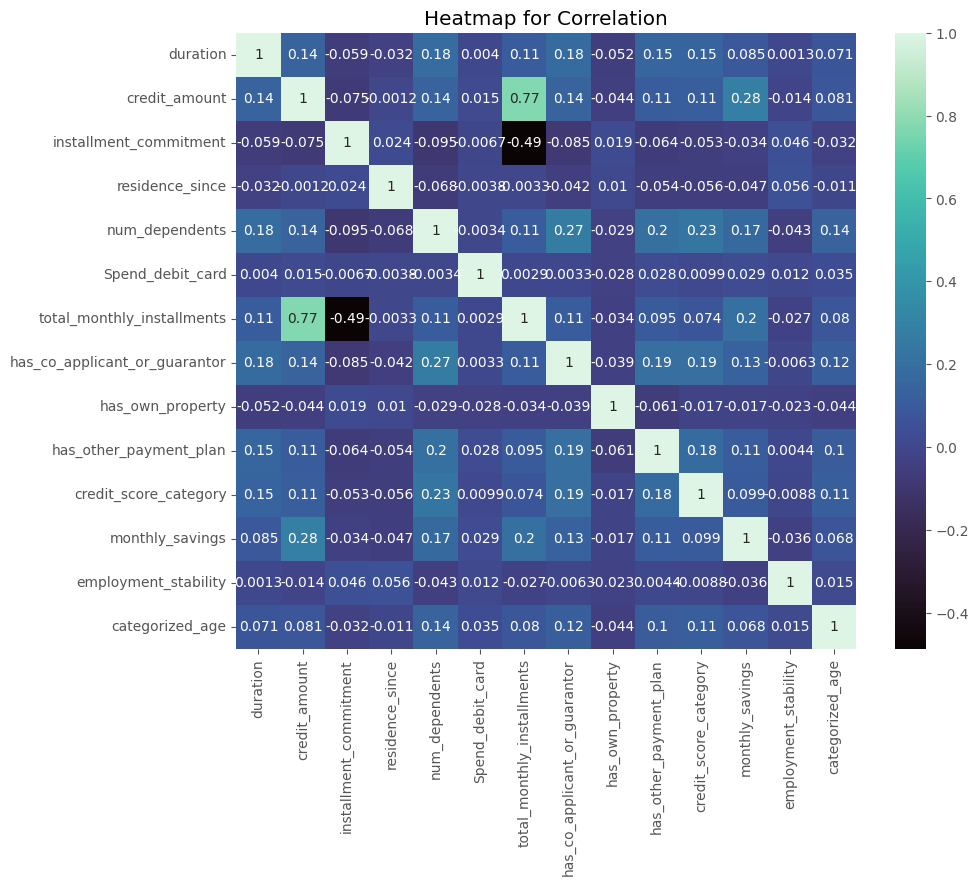

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="mako")
plt.title("Heatmap for Correlation")
plt.show()

There aren't any characteristics that are both highly and inversely connected. If we had, we could have specified the requirement that we could have dropped those characteristics if the correlation was greater than 0.8 and less than -0.8. Considering that those connected features would have served the same purpose.


In [36]:
categorical_variable = data.select_dtypes(include=np.object).columns

## Categorical feature encoding
Only numerical values can be read by machine learning algorithms. Consequently, it is imperative to convert category qualities into numerical values.


In [37]:
le= LabelEncoder()

for feature in categorical_variable:
    data[feature]= le.fit_transform(data[feature])

## Separating independent and dependent variables

In [38]:
X=data.drop(["class"],axis=1)
X

,checking_status,duration,credit_history,purpose,credit_amount,installment_commitment,personal_status,residence_since,housing,job,...,foreign_worker,Spend_debit_card,total_monthly_installments,has_co_applicant_or_guarantor,has_own_property,has_other_payment_plan,credit_score_category,monthly_savings,employment_stability,categorized_age
0,1,19.0,1,0,640.0,1,1,1,0,2,...,0,3463.0,640.0,1,1,1,0,50,0,0
1,1,60.0,3,0,903.0,2,1,2,0,2,...,1,1048.0,451.5,1,1,1,2,50,0,0
2,1,72.0,1,0,523.0,2,1,2,0,2,...,0,357.0,261.5,1,1,1,0,50,0,0
3,1,33.0,3,0,605.0,2,1,4,0,1,...,1,1296.0,302.5,1,1,0,2,50,1,0
4,1,67.0,2,0,709.0,2,1,3,0,3,...,0,1015.0,354.5,1,0,1,0,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,3,17.0,0,9,656.0,4,3,1,2,2,...,0,502.0,164.0,0,1,0,1,0,0,1
5046,3,42.0,0,9,1618.0,4,1,2,2,1,...,0,1747.0,404.5,0,1,1,2,750,0,1
5047,3,42.0,1,9,17037.0,1,3,4,1,3,...,0,3386.0,17037.0,0,0,0,3,750,1,1
5048,3,14.0,4,9,15007.0,2,3,2,2,2,...,0,3570.0,7503.5,0,0,1,1,50,0,0


In [39]:
y=data["class"]
y

0       0
1       1
2       0
3       0
4       0
       ..
5045    1
5046    1
5047    1
5048    1
5049    1
Name: class, Length: 5050, dtype: int64

## Handling imbalanced dataset


The class distribution in the target variable is ~64:36 indicating an imbalance dataset

In [40]:
#implementing oversampling to data
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [41]:
## target class count of resampled dataset
y.value_counts()

0    3204
1    3204
Name: class, dtype: int64

## Standardization


Standardization is a data preprocessing technique that scales numerical features to have a mean of 0 and a standard deviation of 1.

In [42]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized

array([[-0.51706047, -0.84923829, -0.83019787, ..., -0.87387439,
        -0.72130763, -1.34147029],
       [-0.51706047,  1.28403206,  0.64182979, ..., -0.87387439,
        -0.72130763, -1.34147029],
       [-0.51706047,  1.90840387, -0.83019787, ..., -0.87387439,
        -0.72130763, -1.34147029],
       ...,
       [-0.51706047,  1.76738201, -0.83019787, ...,  2.02353497,
        -0.72130763,  0.12419751],
       [ 0.36602149, -1.01149466, -0.83019787, ..., -0.87387439,
        -0.72130763,  0.12419751],
       [ 0.36602149, -0.8916002 , -1.5662117 , ..., -0.39030676,
        -0.72130763, -1.34147029]])

## Feature Importance


In [43]:
forest=ExtraTreesClassifier(n_estimators=205,random_state=7)
forest.fit(X_standardized,y)
imp=forest.feature_importances_
std =np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)

indices=np.argsort(imp)[::-1]

for i in range(X_standardized.shape[1]):
  print("%d. feature %d (%i)" % (i+1,indices[i],imp[indices[i]]))

1. feature 10 (0)
2. feature 1 (0)
3. feature 4 (0)
4. feature 13 (0)
5. feature 14 (0)
6. feature 3 (0)
7. feature 0 (0)
8. feature 19 (0)
9. feature 2 (0)
10. feature 7 (0)
11. feature 9 (0)
12. feature 5 (0)
13. feature 6 (0)
14. feature 18 (0)
15. feature 21 (0)
16. feature 8 (0)
17. feature 17 (0)
18. feature 15 (0)
19. feature 12 (0)
20. feature 11 (0)
21. feature 20 (0)
22. feature 16 (0)


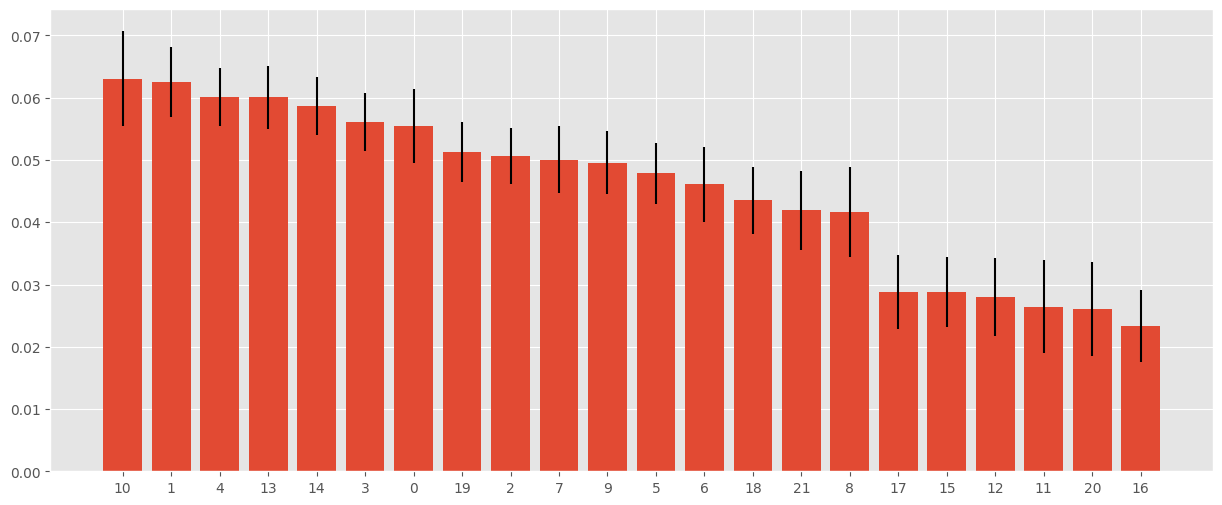

In [44]:
plt.figure(figsize=(15,6))
plt.bar(range(X_standardized.shape[1]),imp[indices],yerr=std[indices])
plt.xticks(range(X_standardized.shape[1]),indices)
plt.show()

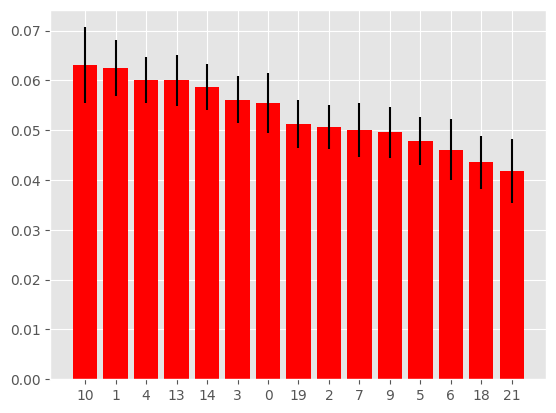

In [45]:
p=imp[indices][:15]
q=indices[:15]
plt.figure()
plt.bar(range(15),p,color="r",yerr=std[q],align="center")
plt.xticks(range(15),q)
plt.show()

We can observe from ExtraTreesClassifier that all features are almost equally important.


Let's Explore with PCA as well.

In [46]:
pca = PCA()
pca_values = pca.fit_transform(X_standardized)
pca_values

array([[-1.28336502e-01, -7.36996320e-01, -2.03943568e+00, ...,
        -8.11908973e-01, -3.13352057e-01, -3.39147708e-01],
       [-5.26382802e-01, -9.34531828e-01, -1.43277590e+00, ...,
        -3.09534533e-01,  1.09475682e+00, -7.74399399e-02],
       [ 2.75145447e-01, -1.48759585e+00, -2.57126728e+00, ...,
        -1.08496882e-03, -7.08736031e-01, -2.70065243e-02],
       ...,
       [ 1.24088082e+00, -1.55676110e+00, -2.26995188e+00, ...,
         6.05702644e-01,  1.19320740e+00, -1.34207524e-02],
       [-2.10089966e-01,  4.06389845e-01, -1.06310152e+00, ...,
        -1.38059090e+00, -6.84240755e-01, -2.24685972e-01],
       [-2.87733394e+00,  1.23256348e+00, -1.42607735e+00, ...,
        -3.88220514e-01, -2.47185960e-01,  3.44371208e-01]])

In [47]:
pca.explained_variance_

array([2.46867146, 1.56901676, 1.3552331 , 1.13010562, 1.05222728,
       1.03731373, 1.02113518, 1.00922873, 0.97212097, 0.95850542,
       0.9489601 , 0.92417591, 0.9203672 , 0.89542568, 0.88214293,
       0.84574361, 0.83409583, 0.81058704, 0.79797003, 0.75909445,
       0.69809489, 0.11321782])

In [48]:
var = pca.explained_variance_ratio_
var

array([0.11219483, 0.07130781, 0.06159189, 0.05136042, 0.04782105,
       0.04714327, 0.04640799, 0.04586687, 0.04418042, 0.04356163,
       0.04312782, 0.04200144, 0.04182834, 0.04069482, 0.04009115,
       0.03843689, 0.03790753, 0.03683912, 0.0362657 , 0.03449891,
       0.03172663, 0.00514546])

In [49]:
# Cumulative variance
var1 = np.cumsum(np.round(var, decimals = 4)*100)
var1

array([11.22, 18.35, 24.51, 29.65, 34.43, 39.14, 43.78, 48.37, 52.79,
       57.15, 61.46, 65.66, 69.84, 73.91, 77.92, 81.76, 85.55, 89.23,
       92.86, 96.31, 99.48, 99.99])

In [50]:
pca.components_

array([[ 7.18803580e-02,  2.37656904e-01, -2.54949938e-02,
        -5.36050480e-02,  4.29043728e-01, -2.49620215e-01,
        -6.20630594e-03, -6.60548081e-02, -1.11360021e-02,
         3.75982377e-02,  3.18082869e-01,  7.00915225e-02,
        -2.04069652e-01,  3.50210142e-02,  4.51980329e-01,
         2.84608589e-01, -7.46018005e-02,  2.44311646e-01,
         2.51603793e-01,  2.89139914e-01, -1.77064507e-02,
         1.89152236e-01],
       [-2.87276666e-03, -1.96820530e-01, -7.57861219e-02,
        -1.70492607e-02,  3.89706729e-01, -2.68460934e-01,
        -5.56634170e-02,  8.96808183e-02, -3.10960987e-02,
        -1.41113629e-01, -2.97802156e-01, -9.26100718e-02,
         1.99908681e-01, -4.55466108e-02,  5.02335822e-01,
        -2.95134904e-01,  2.01082935e-02, -2.80635447e-01,
        -3.12823078e-01,  1.90602820e-02, -7.02416964e-02,
        -1.95429878e-01],
       [ 3.05890649e-01, -9.41556435e-02,  6.95613902e-02,
         1.83883454e-01,  1.02893759e-01,  8.05002796e-02,
    

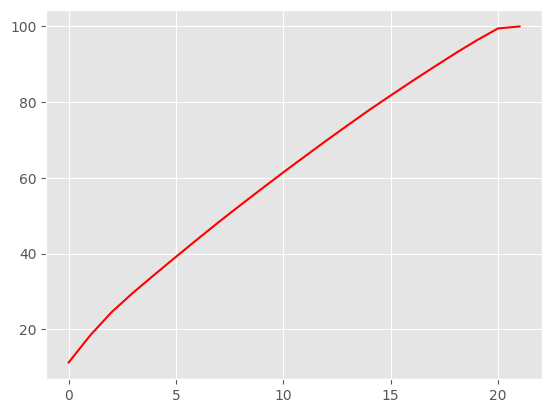

In [51]:
plt.plot(var1, color="red")

In [52]:
final_df=pd.DataFrame(pca_values[:,0:15],columns=["pca1","pca2","pca3","pca4","pca5","pca6","pca7","pca8","pca9","pca10","pca11","pca12","pca13","pca14","pca15"])
final_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15
0,-0.128337,-0.736996,-2.039436,-0.312582,-1.258040,-0.034196,0.102120,-1.191881,-1.332599,-1.428852,1.144483,0.227927,-1.368003,-0.704842,-0.510809
1,-0.526383,-0.934532,-1.432776,-1.174856,0.187810,-0.675505,0.881665,-1.749979,0.889478,-1.149852,0.502380,-0.360140,0.142941,-1.208326,-1.648135
2,0.275145,-1.487596,-2.571267,-0.954369,-0.307613,-1.089119,-0.875383,-1.780587,1.098056,-1.304311,1.071149,0.111655,0.581608,0.101998,-1.406591
3,-1.727094,0.146537,0.045188,-0.393090,0.085545,-0.940183,0.383865,-2.035396,1.168332,-1.935992,-0.677483,0.336576,0.583364,-1.004042,0.037256
4,-0.150375,-1.143163,-1.613008,0.540707,-0.493689,-1.285637,0.740835,-2.735987,-0.170114,-0.513649,0.992793,-1.372189,0.465121,1.040770,-1.357206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,0.718632,0.345360,-0.446279,-1.457753,0.197781,-0.380859,-0.195243,1.068558,-1.113571,0.044581,-1.424963,-0.306006,0.663147,-0.768544,-0.367425
6404,0.535715,2.229781,-2.207969,-0.840975,0.205660,0.953563,-1.658002,-0.326419,-0.834101,-0.342588,1.408247,0.341001,-0.239946,-0.600524,1.061568
6405,1.240881,-1.556761,-2.269952,0.064851,-0.054876,0.034344,-0.638909,-0.315333,0.634609,1.174663,1.879032,-0.776848,0.942678,1.052849,0.087492
6406,-0.210090,0.406390,-1.063102,-0.059810,-1.878704,0.711301,-0.803626,0.127899,0.077811,-1.405285,-1.102997,0.216709,-0.399540,0.694339,-0.144704


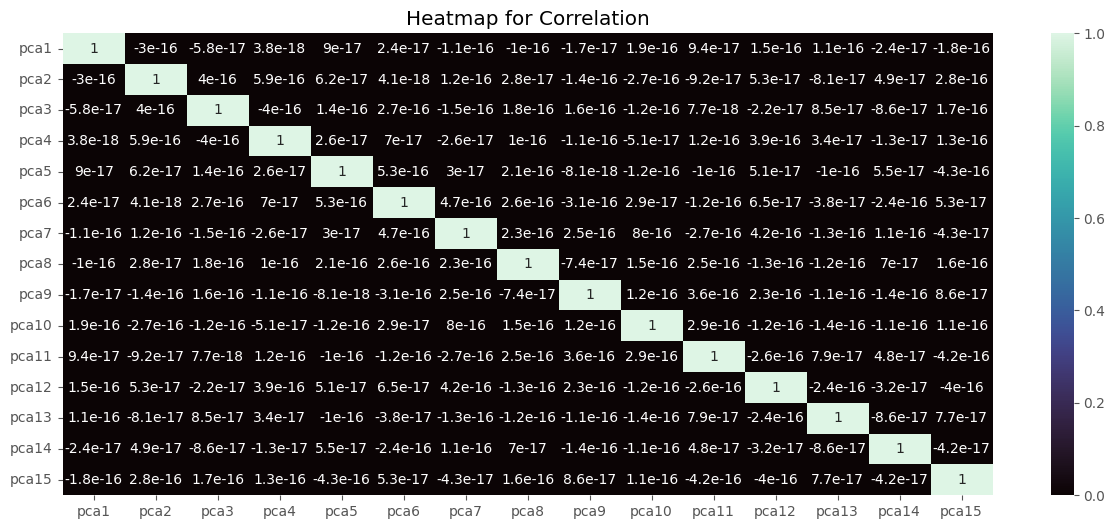

In [73]:
plt.figure(figsize=(15,6))
sns.heatmap(final_df.corr(),annot=True,cmap="mako")
plt.title("Heatmap for Correlation")
plt.show()

Only about 29.57% of the total variation is explained by the first two principal components, indicating that they have a minimal influence on the original data. Although the cumulative variance rises as we proceed down the array, even the final principal component only accounts for 0.01% of the overall variance, showing that it has little impact on the final dataset.

From the heatmap, we can see there is no much correlation betweens principle components.

## Splitting resampled data in train and test data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Model Buiding and Hyperparameter Tunning

## Logistic Regression

In [55]:
# Build Logistic Regression Model
lr = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [56]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [57]:
y_pred_logistic = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logistic)

In [58]:
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on Test Set: 0.6170046801872074


In [59]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.63      0.60      0.61       648
           1       0.61      0.63      0.62       634

    accuracy                           0.62      1282
   macro avg       0.62      0.62      0.62      1282
weighted avg       0.62      0.62      0.62      1282



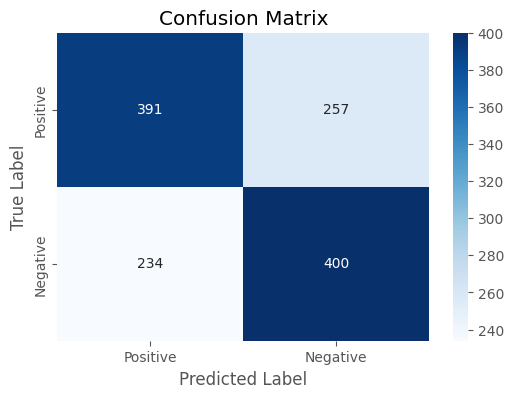

In [60]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

class_labels = ['Positive', 'Negative']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Random Forest

In [61]:
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [150, 200]},
             scoring='accuracy')

In [62]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [63]:
y_pred_random_forest = best_model.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred_random_forest)

In [65]:
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 200}
Accuracy on Test Set: 0.6700468018720749


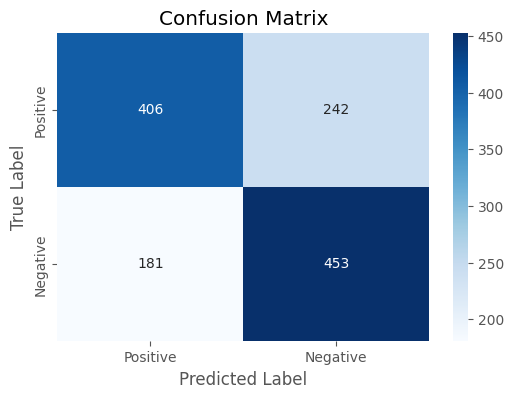

In [66]:
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

class_labels = ['Positive', 'Negative']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_random_forest, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## AUC and ROC curve for both models

In [67]:
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, y_pred_random_forest)
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)


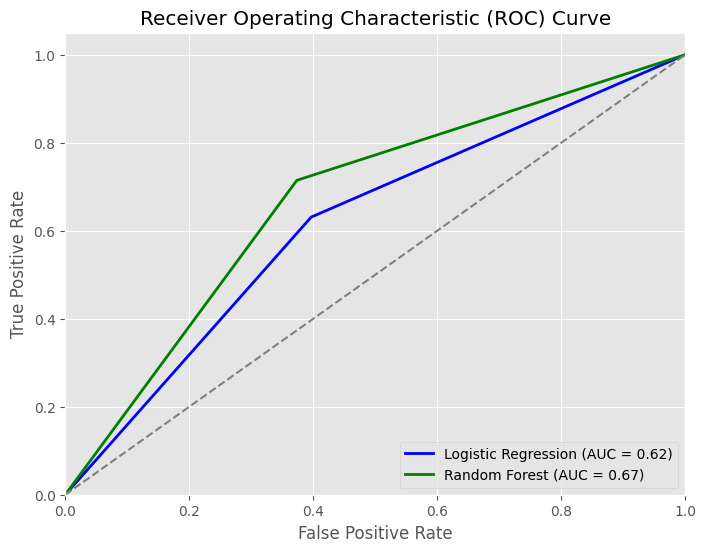

In [68]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_random_forest, tpr_random_forest, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_random_forest:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The Random forest has higher accuracy than logistic regression.

The Random Forest model predicts the largest area under the curve.